In [26]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [27]:
using Revise
includet("./base.jl")

using StatsBase
using UnPack
# using DimensionalData
# includet("../../../scripts/dimdata_util.jl")

In [28]:
using GLMakie
using CairoMakie

# Load data

## First v2

In [81]:
f = jldopen("./v2main_highN0_diffs.jld2")
logKs = f["logKs"]
ls = f["ls"][2:end-1]
leak_xs = LeakageScale.ltox.(ls)
T = f["T"]
fss = f["final_states"][:,2:end-1]
fTs = f["final_T"][:,2:end-1]

@show countmap(f["retcodes"])
@show T
@show countmap(fTs);

countmap(f["retcodes"]) = Dict{SciMLBase.ReturnCode.T, Int64}(SciMLBase.ReturnCode.Success => 2400)
T = 1.0e6
countmap(fTs) = Dict(1.0e6 => 2240)


In [83]:
f["ls"]

0.0:0.034482758620689655:1.0

## Run no-space

In [60]:
@time nospace_results = run_Kl_nospace(f;
    ls=ls
)

nsfss = nospace_results.final_states
nsfTs = nospace_results.final_Ts

countmap(nospace_results.retcodes)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


  7.074740 seconds (15.94 M allocations: 1.343 GiB, 0.90% gc time, 1.02% compilation time)


Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 2240

# Util

In [71]:
function clamp_for_log(xx)
    clamp.(xx, max(minimum(xx), eps()), Inf)
end
function make_hm_ax(args...; kwargs...)
    Axis(args...;
        yticks=exticks,
        ylabel=L"\epsilon",
        xlabel=L"K",
        xscale=log10,
        kwargs...
    )
end

make_hm_ax (generic function with 1 method)

# Basics

In [72]:
ext_ls = extrema(ls)
exticks = LeakageScale.exticks(range(1 - ext_ls[2], 1 - ext_ls[1], 7))

([3.332204510175205, 1.4522523289116884, 0.6418538861723948, -0.0, -0.6418538861723947, -1.4522523289116884, -3.332204510175205], ["0.03", "0.19", "0.34", "0.50", "0.66", "0.81", "0.97"])

In [73]:
fs_N = map(fss) do fs
    mean(fs[1,:])
end;
fs_N_ext = map(fss) do fs
    ex = extrema(fs[1,:])
    ex[2] - ex[1]
end;

In [77]:
wsNs = clamp_for_log(fs_N)
nsNs = clamp_for_log(getindex.(nsfss, 1))
dNs = wsNs .- nsNs
ext = extrema(vcat(wsNs, nsNs))

(2.220446049250313e-16, 9998.965517122473)

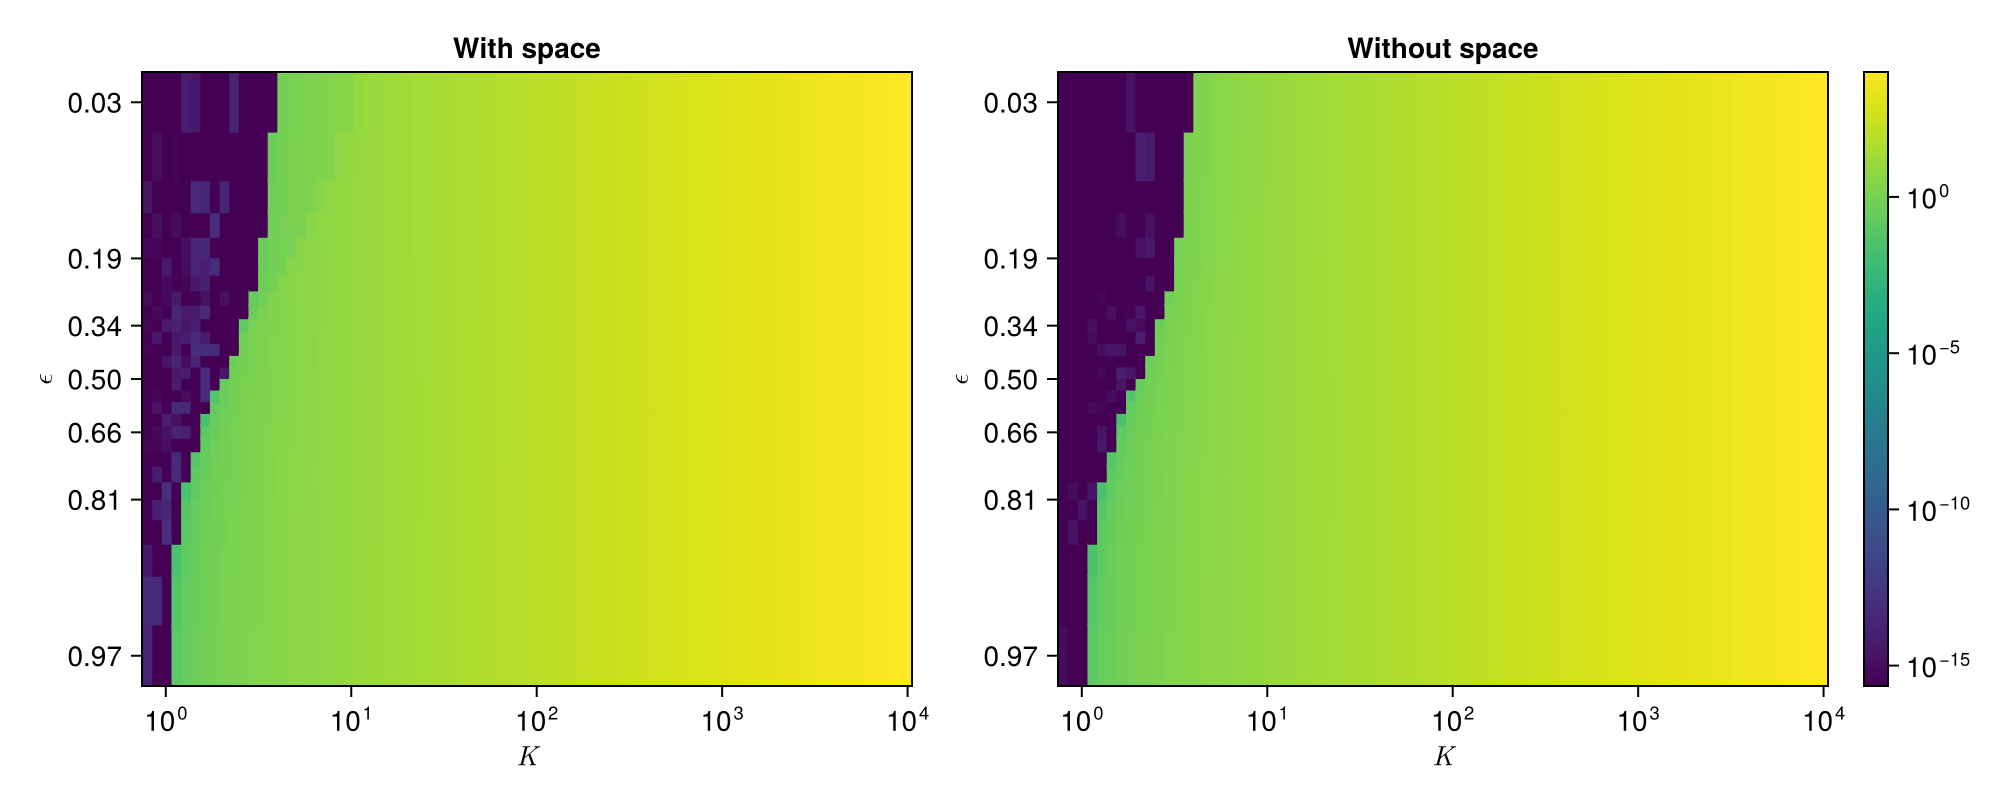

In [75]:
fig = Figure(; size=(1000, 400))
ax1 = make_hm_ax(fig[1,1]; title="With space")
ax2 = make_hm_ax(fig[1,2]; title="Without space")

hm1 = heatmap!(ax1, 10 .^ logKs, leak_xs, wsNs;
    colorscale=log10,
    colorrange=ext
)
hm2 = heatmap!(ax2, 10 .^ logKs, leak_xs, nsNs;
    colorscale=log10,
    colorrange=ext
)

Colorbar(fig[1,3], hm1)
fig

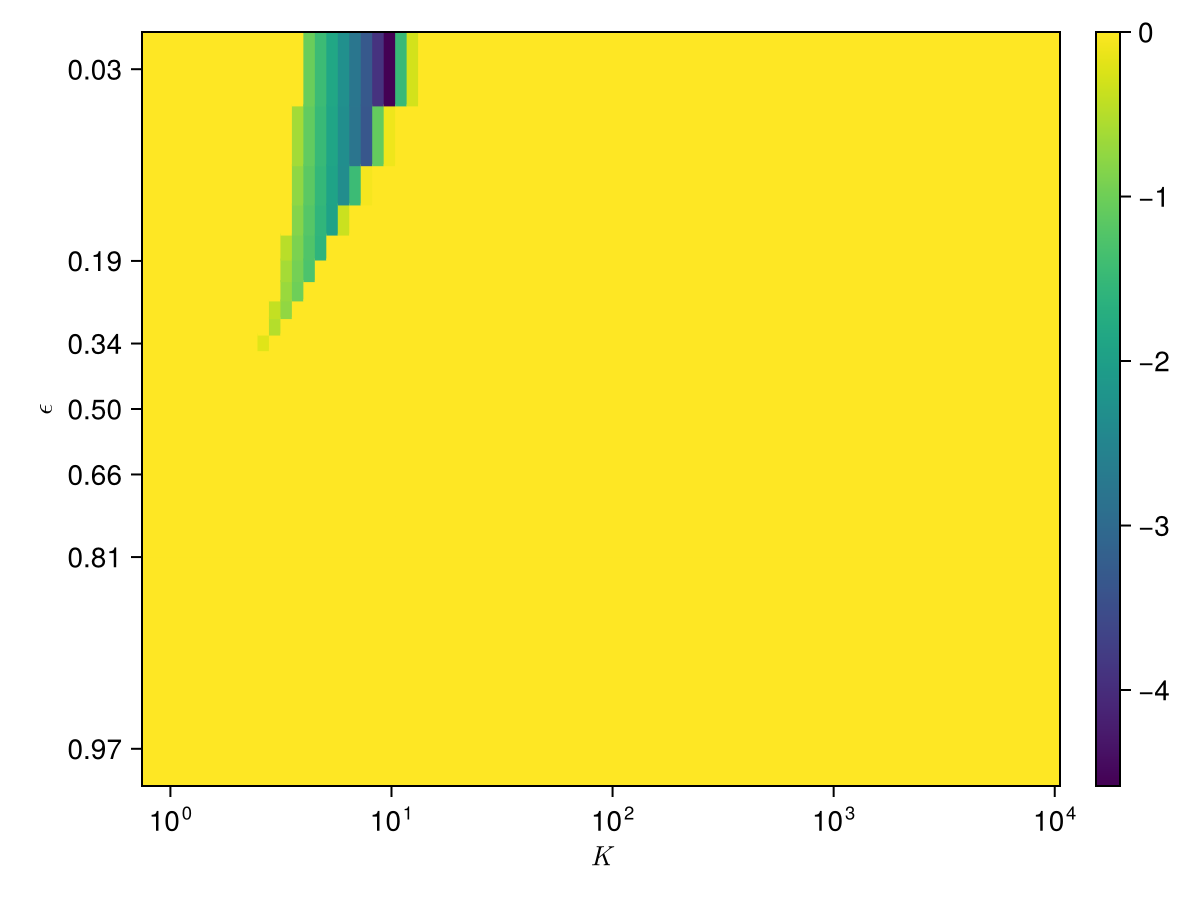

In [80]:
fig = Figure()
ax = make_hm_ax(fig[1,1])

hm = heatmap!(ax, 10 .^ logKs, leak_xs, dNs)

Colorbar(fig[1,2], hm)

fig